# Who has the higher villain to hero ratio?
# - Anna Remler

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [5]:
# Checking to see if API works
import requests
url = "https://superheroapi.com/api/10229722834886310/70/biography"
response = requests.get(url)
response.json()

{'response': 'success',
 'id': '70',
 'name': 'Batman',
 'full-name': 'Bruce Wayne',
 'alter-egos': 'No alter egos found.',
 'aliases': ['Insider', 'Matches Malone'],
 'place-of-birth': 'Crest Hill, Bristol Township; Gotham County',
 'first-appearance': 'Detective Comics #27',
 'publisher': 'DC Comics',
 'alignment': 'good'}

In [7]:
#Note: There are 731 characters but for the sake of testing until publishing, I have only put 15.
database = []
for i in range(1, 732):
    url = f"https://superheroapi.com/api/10229722834886310/{i}/biography"
    response = requests.get(url).json()
    database.append(response)

In [8]:
df= pd.DataFrame(database)
df

,response,id,name,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment
0,success,1,A-Bomb,Richard Milhouse Jones,No alter egos found.,[Rick Jones],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,success,2,Abe Sapien,Abraham Sapien,No alter egos found.,"[Langdon Everett Caul, Abraham Sapien, Langdon...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,success,3,Abin Sur,,No alter egos found.,[Lagzia],Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,success,4,Abomination,Emil Blonsky,No alter egos found.,"[Agent R-7, Ravager of Worlds]","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,success,5,Abraxas,Abraxas,No alter egos found.,[-],Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad
...,...,...,...,...,...,...,...,...,...,...
726,success,727,Yellowjacket II,Rita DeMara,No alter egos found.,[-],-,Avengers #264,Marvel Comics,good
727,success,728,Ymir,Ymir,No alter egos found.,[Aurgelmir],Niffleheim,JOURNEY INTO MYSTERY #97,Marvel Comics,good
728,success,729,Yoda,Yoda,No alter egos found.,[-],-,Star Wars: Episode V - The Empire Strikes Back...,George Lucas,good
729,success,730,Zatanna,Zatanna Zatara,No alter egos found.,[-],-,Hawkman #4,DC Comics,good


In [9]:
df["alignment"].value_counts()

good       494
bad        206
neutral     24
-            7
Name: alignment, dtype: int64

In [10]:
## Used to help clean and sort data
# df["publisher"].value_counts().to_csv("publishercount.csv")

In [46]:
df_marvel= df.loc[
    (df["publisher"]== "Marvel Comics")|
    (df["publisher"]== "Sharon Carter") |
    (df["publisher"]== "Deadpool") |
    (df["publisher"]== "Evil Deadpool") |
    (df["publisher"]== "Goliath") |
    (df["publisher"]== "Ant-Man") |
    (df["publisher"]== "Binary") |
    (df["publisher"]== "Deadpool") |
    (df["publisher"]== "Sony Pictures") |
    (df["publisher"]== "Anti-Vision") |
    (df["publisher"]== "Speedball") |
    (df["publisher"]== "Jean Grey") |
    (df["publisher"]== "She-Thing") |
    (df["publisher"]== "Boom-Boom") |
    (df["publisher"]== "Luke Cage") |
    (df["publisher"]== "Vindicator II") |
    (df["publisher"]== "Blaquesmith") |
    (df["publisher"]== "Scorpion") |
    (df["publisher"]== "Warpath") |
    (df["publisher"]== "Rune King Thor") |
    (df["publisher"]== "Angel Salvadore") |
    (df["publisher"]== "Scarlet Spider") |
    (df["publisher"]== "Iron Lad") |
    (df["publisher"]== "Penance II") |
    (df["publisher"]== "Ms Marvel II") |
    (df["publisher"]== "Venom III") |
    (df["publisher"]== "Spider-Carnage") |
    (df["publisher"]== "Power Man") |
    (df["publisher"]== "Rebellion") |
    (df["publisher"]== "Giant-Man") |
    (df["publisher"]== "Vertigo II") |
    (df["publisher"]== "Gemini V") |
    (df["publisher"]== "Toxin") |
    (df["publisher"]== "Hawkeye")]

In [47]:
df_dc= df.loc[
    (df["publisher"]== "DC Comics") |
    (df["publisher"]== "Dark Horse Comics")|
    (df["publisher"]== "Hanna-Barbera") | 
    (df["publisher"]== "Wildstorm") | 
    (df["publisher"]== "Oracle") |
    (df["publisher"]== "Nightwing") |
    (df["publisher"]== "Spoiler") |
    (df["publisher"]== "Misfit") |
    (df["publisher"]== "Robin III") |
    (df["publisher"]== "Batman II") |
    (df["publisher"]== "Flash IV") |
    (df["publisher"]== "Batgirl") |
    (df["publisher"]== "Robin II") |
    (df["publisher"]== "Robin III") |
    (df["publisher"]== "Red Robin") |
    (df["publisher"]== "Superman Prime One-Million") |
    (df["publisher"]== "Arsenal") |
    (df["publisher"]== "Aztar") |
    (df["publisher"]== "Angel") |
    (df["publisher"]== "Meltdown") |
    (df["publisher"]== "Tempest") |
    (df["publisher"]== "Huntress") |
    (df["publisher"]== "Impulse") |
    (df["publisher"]== "Power Woman") |
    (df["publisher"]== "Atlas") |
    (df["publisher"]== "Batgirl III")]

In [48]:
df_dc

,response,id,name,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment
1,success,2,Abe Sapien,Abraham Sapien,No alter egos found.,"[Langdon Everett Caul, Abraham Sapien, Langdon...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,success,3,Abin Sur,,No alter egos found.,[Lagzia],Ungara,"Showcase #22 (October, 1959)",DC Comics,good
7,success,8,Adam Strange,Adam Strange,No alter egos found.,"[Warrior of Two Worlds, Savior of Rann]","Chicago, Illinois","Outsiders #6 (April, 1986)",DC Comics,good
13,success,14,Alan Scott,Alan Ladd Wellington Scott,No alter egos found.,"[Green Lantern, White King, Sentinal]",Gotham City,All-American Comics 16 (1940),DC Comics,good
14,success,15,Alex Mercer,Alexander J. Mercer,No alter egos found.,"[Prototype, Zues, Blacklight]",-,-,Wildstorm,bad
...,...,...,...,...,...,...,...,...,...,...
712,success,713,Wildfire,Drake Burroughs,No alter egos found.,"[ERG-1, Atom'x, Randall Burroughs, Jahr-Drake ...",-,-,DC Comics,good
717,success,718,Wonder Girl,Cassandra Elizabeth Sandsmark,No alter egos found.,"[Cassandra Sandsmark, Cassie, Helen Troy, Wond...",-,Wonder Woman (vol. 2) #105 (January 1996),DC Comics,good
719,success,720,Wonder Woman,Diana Prince,No alter egos found.,"[Princess Diana, Princess of the Amazons, Godd...",Themyscira,"All-Star Comics #8 (December, 1941)",DC Comics,good
729,success,730,Zatanna,Zatanna Zatara,No alter egos found.,[-],-,Hawkman #4,DC Comics,good


TypeError: no numeric data to plot

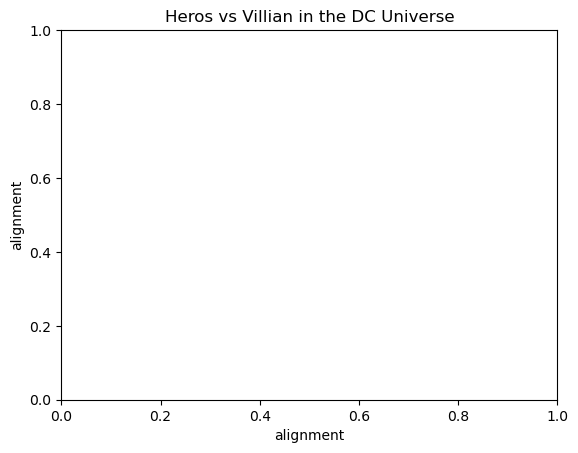

In [21]:
#Bar Chart outlining alignment in DC Universe
dc_alignment = df_dc['alignment'].value_counts()


plt.xlabel("alignment")
plt.ylabel("alignment")

plt.title("Heros vs Villian in the DC Universe")

bar_plot = df_dc.plot.bar()